Colby Snoke 11/30/22
What are the 20 most commonly used words in the Phillies accounts most recent 1000?

Setting up the notebook

In [92]:
import tweepy

In [93]:
consumer_key = '9g7ZRoL31dISnGlCNopfEysOq'
consumer_secret = 'zrCf3NHJ0SHEVuP2asFosjAKRGm7HdebkZgTNbtiSRR5k389nG'
access_token = '14093270-yMNg3eDdghzcQ70kXtIfdTTEK2dIpRblHlyEyom0N'
access_token_secret = 'MvE74KZBKSUpWRcZo04AY17hcv73sQpQmtkoED1RD1Up6'

mapquest_key = 'g96y5XAsM5RwY48eear6aBIGyRMANaGG'

In [94]:
print(tweepy.__version__)

4.12.1


In [95]:
%pip uninstall tweepy -y

Found existing installation: tweepy 4.12.1
Uninstalling tweepy-4.12.1:
  Successfully uninstalled tweepy-4.12.1


In [96]:
%pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tweepy-4.12.1-py3-none-any.whl (101 kB)


In [97]:
import tweepy
print(tweepy.__version__)

4.12.1


In [98]:
%pip install  geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import geopy

In [100]:
bearer_token ='AAAAAAAAAAAAAAAAAAAAACqRjQEAAAAAn8CIDpci7GJnXOnzigz6Tdh5mQo%3DIGTQsLPi9KSfluXiwTvpiKa4P3FfYSr8owkMzcaqJSoqG3OJtV'

Creating Client Object

In [101]:
client = tweepy.Client(bearer_token=bearer_token,
                       wait_on_rate_limit=True)

In [102]:
phillies = client.get_user(username='Phillies', 
    user_fields=['description', 'public_metrics'])
phillies.data.location

In [103]:
phillies.data.description

'Tweets from the Fightins. Catch us at our crib @PhilliesCBP. #RingTheBell'

In [104]:
auth = tweepy.OAuthHandler(consumer_key,
                           consumer_secret)

In [105]:
api = tweepy.API(auth, wait_on_rate_limit=True)


In [106]:
phillies_tweets = api.user_timeline(screen_name='Phillies', count=300)

In [107]:
phillies_tweets

Output hidden; open in https://colab.research.google.com to view.

In [108]:
tweets = []

In [109]:
for tweet in phillies_tweets:
     tweets.append(tweet.text)

In [110]:
tweets

['Watch as Manager Rob Thomson addresses the media at the Winter Meetings presented by @CohnReznick. https://t.co/i62FlnFJZc',
 'RT @MLB: Kyle Schwarber is #ALLIN to make a run at a repeat for Team USA. https://t.co/lXOxijEeGb',
 '@abbythepilot @brandon_marsh22 WE LOVE ❤️',
 'Thank you for everything, @kgib44! https://t.co/yAEK3oBuOr',
 'RT @PhilliesNotes: Congratulations to Kevin Gregg, Phillies VP of Baseball Communications, the 2022 Robert O. Fishel Award winner. \n\nThe aw…',
 'Schwarbs for All-MLB Second Team.\n\nAs if there was ever a doubt. https://t.co/m04mxkJfMP',
 'What a year, Nols.\n\nCongratulations on making the All-MLB Second Team! https://t.co/mP8YvLbiXD',
 '@MLB @JTRealmuto BCIB',
 'The BCIB gets on the All-MLB First Team, as he should.\n\nCongrats, J.T.! https://t.co/T1J38EeDFn',
 'RT @philliesNEstore: Our 12 Days of Deals are back, starting this Friday, 12/9. Check out the schedule here! Also, doorbusters will be avai…',
 '@dhwanisaraiya_ @bryceharper3 another Dhwani

Install Pre-processor Package

In [111]:
%pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import preprocessor as p

In [113]:
p.set_options(p.OPT.URL, p.OPT.RESERVED)

In [114]:
# create loop to clean tweets 

In [115]:
clean_tweets = []
p.clean(tweets[1])

'@MLB: Kyle Schwarber is #ALLIN to make a run at a repeat for Team USA.'

In [116]:
for ctweet in tweets:
  clean_tweets.append(p.clean(ctweet))

In [117]:
clean_tweets

['Watch as Manager Rob Thomson addresses the media at the Winter Meetings presented by @CohnReznick.',
 '@MLB: Kyle Schwarber is #ALLIN to make a run at a repeat for Team USA.',
 '@abbythepilot @brandon_marsh22 WE LOVE ❤️',
 'Thank you for everything, @kgib44!',
 '@PhilliesNotes: Congratulations to Kevin Gregg, Phillies VP of Baseball Communications, the 2022 Robert O. Fishel Award winner. The aw…',
 'Schwarbs for All-MLB Second Team. As if there was ever a doubt.',
 'What a year, Nols. Congratulations on making the All-MLB Second Team!',
 '@MLB @JTRealmuto BCIB',
 'The BCIB gets on the All-MLB First Team, as he should. Congrats, J.T.!',
 '@philliesNEstore: Our 12 Days of Deals are back, starting this Friday, 12/9. Check out the schedule here! Also, doorbusters will be avai…',
 '@dhwanisaraiya_ @bryceharper3 another Dhwani W 🤩',
 'The Phillies have claimed outfielder Jake Cave off waivers from the Baltimore Orioles, President of Baseball Operat…',
 '@calumscott philly loves you back \U

In [118]:
final_tweets = {}

In [119]:
from wordcloud import WordCloud

In [146]:
wordcloud = WordCloud(width = 1000, height = 500, max_words = 20, background_color= 'white', colormap= 'prism').generate(" ".join(clean_tweets))

In [147]:
wordcloud = wordcloud.to_file('PhilliesTweets.png')

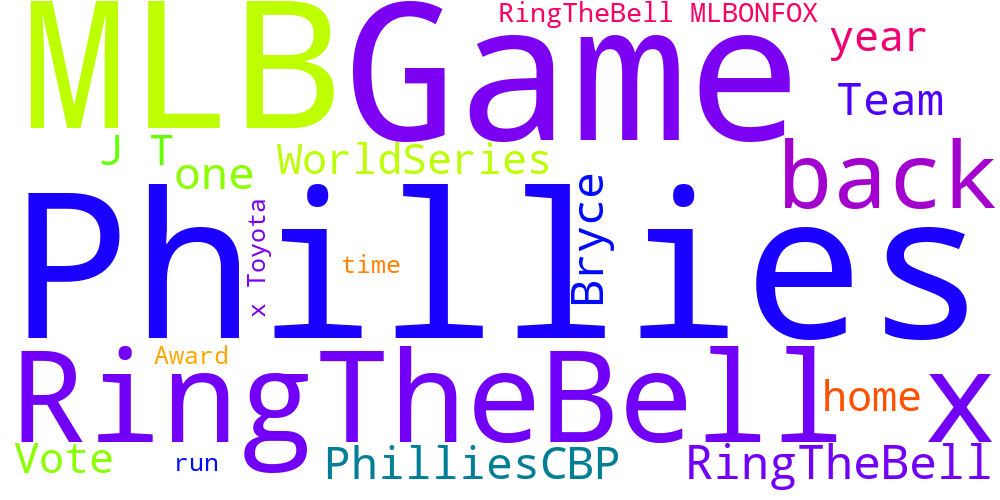

In [148]:
from IPython.display import Image
Image(filename='PhilliesTweets.png', width=400)

Conclusion: Over the Phillies past 300 tweets the word "Phillies" was tweeted the most. I was not surprised to the see the words "home" and "run" appear in the top 20 words. I am surprised to not see more generic words such as "the" or "and". I feel like these words are popular and used in many sentences. 